In [9]:
import numpy as np

from sklearn.cluster import k_means
import matplotlib.pyplot as plt

In [10]:
# create some gaussian cluster

c1 = np.random.multivariate_normal([1,1], [[1,0],[0,1]], 100)
c2 = np.random.multivariate_normal([5,5], [[1.5,0],[0,1.5]], 100)
c3 = np.random.multivariate_normal([1.5,4], [[0.5,0],[0,0.5]], 100)
                                   
data = np.vstack([np.vstack([c1,c2]),c3])                                   

Text(0.5, 1.0, 'Generated clusters')

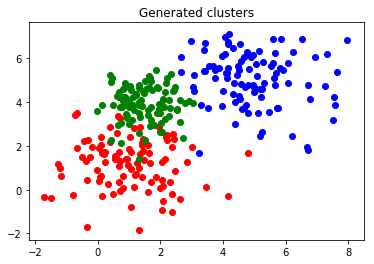

In [11]:
plt.scatter(c1[:,0],c1[:,1], color='r')
plt.scatter(c2[:,0],c2[:,1], color='b')
plt.scatter(c3[:,0],c3[:,1], color='g')
plt.title('Generated clusters')

In [12]:
# randomly initialise centroids

cluster_no = 3

idxs = np.random.choice(data.shape[0], cluster_no, replace=False)

m1 = data[idxs[0],:]
m2 = data[idxs[1],:]
m3 = data[idxs[2],:]

centroids = [m1,m2,m3]

Text(0.5, 1.0, 'Data with randomly intialised centroids')

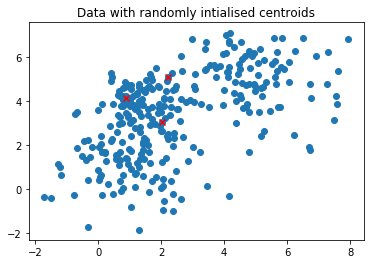

In [13]:
plt.scatter(data[:,0],data[:,1])
plt.scatter(m1[0], m1[1], marker='x', color='r')
plt.scatter(m2[0], m2[1], marker='x', color='r')
plt.scatter(m3[0], m3[1], marker='x', color='r')
plt.title('Data with randomly intialised centroids')

## k-means algorithm

We assign each data point its nearest centroid, so each data point is assigned to a cluster. 

We then update the centroids by finding the new centroids of the new clusters. This is repeated until the data points assignments no longer change. 

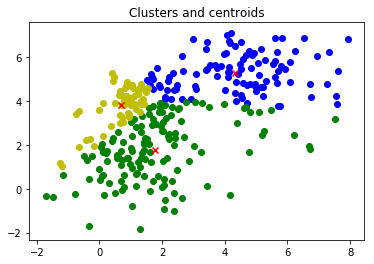

Convergence: False


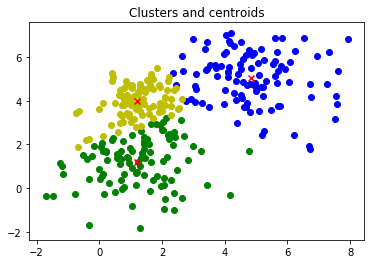

Convergence: False


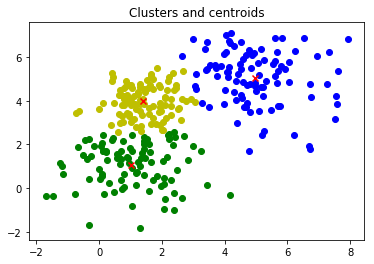

Convergence: False


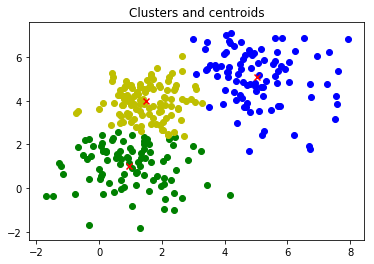

Convergence: False


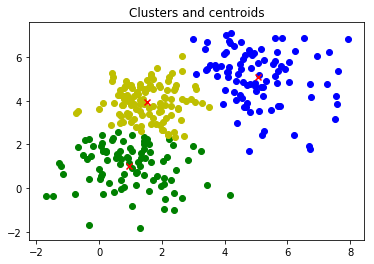

Convergence: False


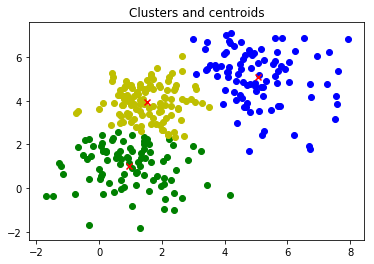

Convergence: True


In [14]:
converged = False

while converged == False:
    labels = []
    centroid1, centroid2, centroid3 = [], [], []

    for i in range(data.shape[0]):
        dists = [np.linalg.norm(data[i,:] - m) for m in centroids]
        assignment = np.argmin(dists)
        labels.append(assignment)
        if assignment == 0:
            centroid1.append(data[i,:])
        elif assignment == 1:
            centroid2.append(data[i,:])
        else:
            centroid3.append(data[i,:])

    centroid1, centroid2, centroid3 = np.stack(centroid1), np.stack(centroid2), np.stack(centroid3)

    # update centroids

    m1 = np.array([np.mean(centroid1[:,0]), np.mean(centroid1[:,1])])
    m2 = np.array([np.mean(centroid2[:,0]), np.mean(centroid2[:,1])])
    m3 = np.array([np.mean(centroid3[:,0]), np.mean(centroid3[:,1])])
    
    plt.scatter(centroid1[:,0],centroid1[:,1], color='b')
    plt.scatter(centroid2[:,0],centroid2[:,1], color='g')
    plt.scatter(centroid3[:,0],centroid3[:,1], color='y')
    plt.scatter(m1[0], m1[1], marker='x', color='r')
    plt.scatter(m2[0], m2[1], marker='x', color='r')
    plt.scatter(m3[0], m3[1], marker='x', color='r')
    
    plt.title('Clusters and centroids')
    plt.show()
    
    # check convergence
    
    if np.array_equal(np.stack([m1, m2, m3]), np.stack(centroids)):
        converged = True
    print('Convergence: ' + str(converged))
    
    #update centroids
    
    centroids = [m1, m2, m3]

## Check with sklearn implementation

In [15]:
k_means(data, 3)[0]

array([[1.52490651, 3.92602757],
       [5.0620334 , 5.08105551],
       [0.92798937, 0.97272633]])

In [16]:
centroids

[array([5.0620334 , 5.08105551]),
 array([0.93850565, 1.00440145]),
 array([1.52687465, 3.95204923])]